In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config Completer.use_jedi = False

In [2]:
#Py_df=pd.DataFrame()
import psychrolib
psychrolib.SetUnitSystem(psychrolib.SI)

from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

In [3]:
## Altitude in meters to pressure in Pascals
## Reference  https://www.engineeringtoolbox.com/air-altitude-pressure-d_462.html 
### Altitude of location in Meters 
import math
AltitudeFromSeaLevel = 30
p = (101325)*(1-(2.25577*(10)**(-5))*(AltitudeFromSeaLevel))**5.25588
p

100965.12412724759

In [4]:
##link to documentation of package:  https://psychrometrics.github.io/psychrolib/api_docs.html 
psychrolib.GetHumRatioFromRelHum(25, 0.5, p)

0.00991682484151132

In [5]:
## Intitial data table to plot Givoni index plot
Table=[]
for RH in [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]:
    T1 = []
    for i in range(0,60):
        T1a=psychrolib.GetHumRatioFromRelHum(i, RH, p)
        T1.append(T1a)
        df_T=pd.DataFrame(T1,columns=[str(round(100*RH))+' %'])
    Table.append(df_T)
PsyDataFrame=pd.concat(Table,axis=1)

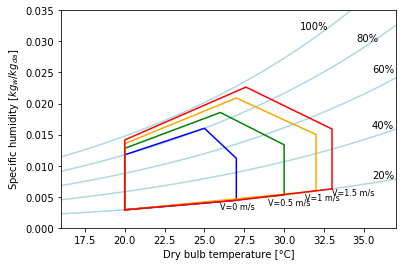

In [6]:
##plot 
PsyDataFrame.plot(y=['20 %','40 %','60 %','80 %','100 %'],color="lightblue",legend=None,
                  label=['_nolegend_','_nolegend_','_nolegend_','_nolegend_','_nolegend_'])

plt.text(35.5, 0.008, '20%')
plt.text(35.5, 0.016, '40%')
plt.text(35.5, 0.025, '60%')
plt.text(34.5, 0.030, '80%')
plt.text(31, 0.032, '100%')
##First polygon
poly1=Polygon([(20,psychrolib.GetHumRatioFromRelHum(20, 0.2, p)),
               (20,psychrolib.GetHumRatioFromRelHum(20, 0.8, p)),
               (25,psychrolib.GetHumRatioFromRelHum(25, 0.8, p)),
               (27,psychrolib.GetHumRatioFromRelHum(27, 0.5, p)),
               (27,psychrolib.GetHumRatioFromRelHum(27, 0.2, p))])

x,y = poly1.exterior.xy
plt.plot(x,y,color="blue")
##Second plygon
poly2=Polygon([(20,psychrolib.GetHumRatioFromRelHum(20, 0.2, p)),
                (20,psychrolib.GetHumRatioFromRelHum(20, 0.87, p)),
                (26,psychrolib.GetHumRatioFromRelHum(26, 0.87, p)),
                (30,psychrolib.GetHumRatioFromRelHum(30, 0.5, p)),
                (30,psychrolib.GetHumRatioFromRelHum(30, 0.2, p))])
x1,y1 = poly2.exterior.xy
plt.plot(x1,y1,color="green")
##Third plygon
poly3=Polygon([(20,psychrolib.GetHumRatioFromRelHum(20, 0.2, p)),
                (20,psychrolib.GetHumRatioFromRelHum(20, 0.92, p)),
                (27,psychrolib.GetHumRatioFromRelHum(27, 0.92, p)),
                (32,psychrolib.GetHumRatioFromRelHum(32, 0.5, p)),
                (32,psychrolib.GetHumRatioFromRelHum(32, 0.2, p))])
x3,y3 = poly3.exterior.xy
plt.plot(x3,y3,color="orange")
##Fourth plygon
poly4=Polygon([(20,psychrolib.GetHumRatioFromRelHum(20, 0.2, p)),
                (20,psychrolib.GetHumRatioFromRelHum(20, 0.96, p)),
                (27.6,psychrolib.GetHumRatioFromRelHum(27.6, 0.96, p)),
                (33,psychrolib.GetHumRatioFromRelHum(33, 0.5, p)),
                (33,psychrolib.GetHumRatioFromRelHum(33, 0.2, p)),
                (27,psychrolib.GetHumRatioFromRelHum(27, 0.2, p))])
x4,y4 = poly4.exterior.xy
plt.plot(x4,y4,color="red")
## Txt on the graph 
plt.text(26, psychrolib.GetHumRatioFromRelHum(26, 0.15, p), 'V=0 m/s',fontsize=8)
plt.text(29, psychrolib.GetHumRatioFromRelHum(29, 0.15, p), 'V=0.5 m/s',fontsize=8)
plt.text(31.3, psychrolib.GetHumRatioFromRelHum(31.3, 0.16, p), 'V=1 m/s',fontsize=8)
plt.text(33, psychrolib.GetHumRatioFromRelHum(33, 0.17, p), 'V=1.5 m/s',fontsize=8)

##plot scatter chart inside polygons
#groups = df1.groupby('DI')
#for name, group in groups:
#    plt.plot(group.TAIR_4_1, group.SpecificHumidity, marker='o',linestyle='', markersize=2, label=name)
#leg = plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.13),ncol=4, markerscale=4)


plt.rcParams["figure.figsize"] = (10,5)
plt.xlim([16, 37])
plt.ylim([0, 0.035])
plt.ylabel("Specific humidity [$kg_w /kg_{da}$]")
plt.xlabel("Dry bulb temperature [\N{DEGREE SIGN}C]")
plt.show()

In [ ]:
## Assuming temperature TAI_3_1, and Relative humdity data (RELHUM_3_1) are 
# supposed to be evaluated if they are inside the polygons are not
Givoni_3_1=[]
for i, row in df.iterrows():
    point=Point(df.TAIR_3_1[i],psychrolib.GetHumRatioFromRelHum(df.TAIR_3_1[i],df.RELHUM_3_1[i]/100,p))
    if df.TAIR_3_1[i]<20:
        TY = 'Givoni under 20 degrees'
    elif poly1.contains(point):
        TY = 'Givoni V=0 m/s'
    elif poly2.contains(point):
        TY = 'Givoni V=0.5 m/s'
    elif poly3.contains(point):
        TY = 'Givoni V=1 m/s'
    elif poly4.contains(point):
        TY = 'Givoni V=1.5 m/s'
    else:
        TY = 'Thermally stressful'
    Givoni_3_1.append(TY)
df['Givoni_3_1']= Givoni_3_1